In [3]:
import kagglehub
import pandas as pd

url = '/content/NBA_2024_per_game(03-01-2024).csv'
df = pd.read_csv(url)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,...,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,0.777,2.1,8.3,10.4,4.0,1.1,1.0,2.7,2.4,22.0
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
X = df.drop('Player', axis = 1)
y = df['Player']
X = X.drop('Tm', axis=1)
print(X.shape)
print(y.shape)
print(X)

(538, 27)
(538,)
      Pos  Age   G  GS    MP   FG   FGA    FG%   3P  3PA  ...    FT%  ORB  \
0    C-PF   24  26   0  17.2  3.0   6.6  0.453  0.5  1.8  ...  0.571  2.0   
1       C   24  25   0  17.5  3.1   6.8  0.459  0.5  1.9  ...  0.571  2.0   
2      PF   24   1   0   9.0  0.0   2.0  0.000  0.0  0.0  ...    NaN  1.0   
3       C   26  23  23  34.1  8.0  15.7  0.506  0.0  0.3  ...  0.777  2.1   
4      SG   23  34  10  21.1  2.6   5.7  0.451  1.2  3.3  ...  0.714  0.8   
..    ...  ...  ..  ..   ...  ...   ...    ...  ...  ...  ...    ...  ...   
533    PF   35   7   0   4.4  0.9   1.4  0.600  0.0  0.0  ...  0.333  0.4   
534    PG   25  30  30  36.6  8.8  20.2  0.436  3.6  9.3  ...  0.860  0.5   
535     C   25  20   6  11.7  1.8   3.5  0.507  0.2  0.7  ...  0.750  1.5   
536     C   31  23   0   9.6  0.6   1.7  0.333  0.0  0.0  ...  0.577  1.2   
537     C   26  32  32  26.9  5.3   8.2  0.644  0.0  0.0  ...  0.621  3.2   

     DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    3.4 

In [6]:
X = X.values
y = y.values

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

X = pd.get_dummies(df, columns=['Pos'], drop_first=True)
X = X.drop(['Player', 'Tm'], axis=1)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels[:10])

[3 3 1 4 0 0 0 2 2 3]


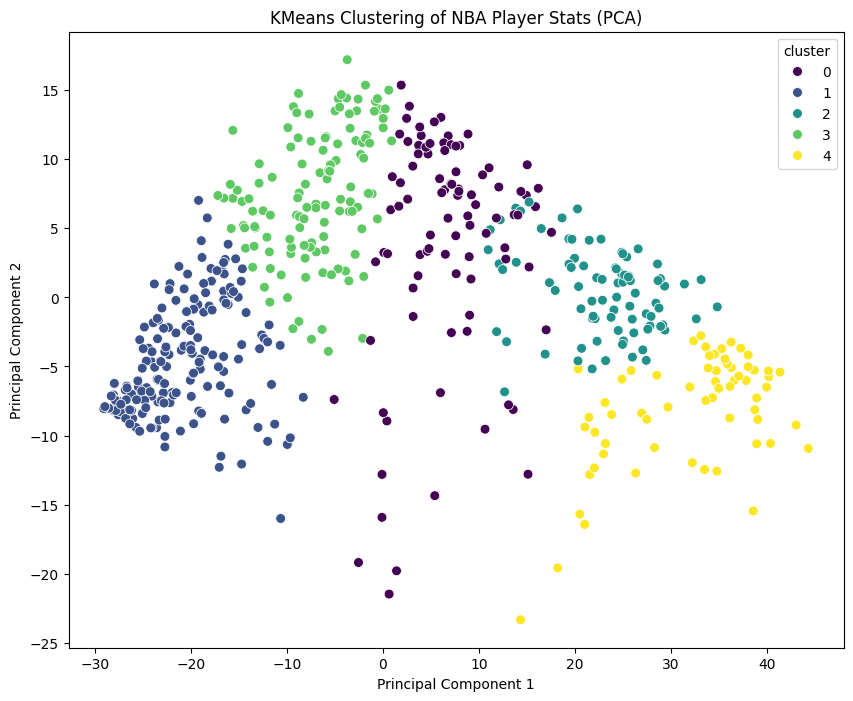

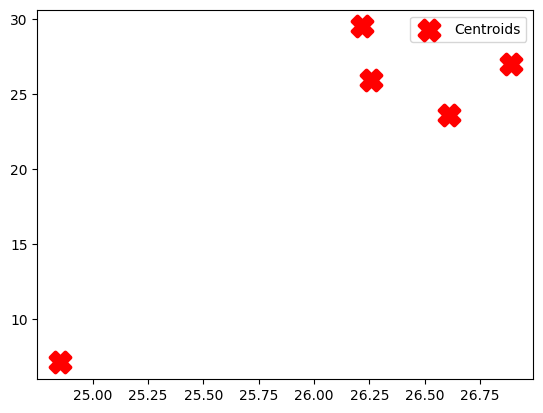

In [8]:
df_plot = pd.DataFrame(X, columns=pd.get_dummies(df, columns=['Pos'], drop_first=True).drop(['Player', 'Tm'], axis=1).columns)
df_plot['cluster'] = labels

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_plot['x'] = X_pca[:, 0]
df_plot['y'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_plot, palette='viridis', s=50)
plt.title('KMeans Clustering of NBA Player Stats (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroids')
plt.legend()
plt.show()

In [9]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

url = '/content/NBA_2024_per_game(03-01-2024).csv'
df = pd.read_csv(url)

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(df, columns=['Pos'], drop_first=True)
X = X.drop(['Tm'], axis=1)  # Drop 'Tm'
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X.drop('Player', axis=1))

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_imputed)
labels = kmeans.labels_
df['cluster'] = labels

for cluster_num in range(5):
    print(f"\nPlayers in Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['Player'].values)


df_plot = pd.DataFrame(X_imputed, columns=X.drop('Player', axis=1).columns)
df_plot['cluster'] = labels

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)
df_plot['x'] = X_pca[:, 0]
df_plot['y'] = X_pca[:, 1]


def plot_clusters(df, col1, col2):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=col1, y=col2, hue='cluster', data=df, palette='viridis', s=50)
    plt.title(f'KMeans Clustering by {col1} vs {col2}')
    plt.show()


Players in Cluster 0:
['Ochai Agbaji' 'Santi Aldama' 'Nickeil Alexander-Walker' 'Kyle Anderson'
 'Cole Anthony' 'OG Anunoby' 'Marvin Bagley III' 'RJ Barrett'
 'Nicolas Batum' 'Nicolas Batum' 'Bradley Beal' 'Bogdan Bogdanović'
 'Bojan Bogdanović' 'Christian Braun' 'Malcolm Brogdon'
 'Wendell Carter Jr.' 'Alex Caruso' 'Bilal Coulibaly' 'Torrey Craig'
 'Jae Crowder' 'Dyson Daniels' 'Donte DiVincenzo' 'Ayo Dosunmu'
 'Jalen Duren' 'Tari Eason' 'Dante Exum' 'Simone Fontecchio'
 'Markelle Fultz' 'Keyonte George' 'Draymond Green' 'Josh Green'
 'Quentin Grimes' 'Rui Hachimura' 'Tim Hardaway Jr.' 'Gary Harris'
 'Josh Hart' 'Isaiah Hartenstein' 'Sam Hauser' 'Jordan Hawkins'
 'Scoot Henderson' 'Buddy Hield' 'Haywood Highsmith' 'Al Horford'
 'Talen Horton-Tucker' 'Jaden Ivey' 'Reggie Jackson' 'Jaime Jaquez Jr.'
 'Jalen Johnson' 'Tre Jones' 'Walker Kessler' 'Corey Kispert'
 'Jonathan Kuminga' 'Caris LeVert' 'Kevin Love' 'Caleb Martin'
 'Bennedict Mathurin' 'Malik Monk' 'Trey Murphy III' 'Andrew Nem

In [10]:
columns_to_weight = ['MP', 'PTS']
X_weighted = X.copy()

# Weight minutes played and PPG higher
for col in columns_to_weight:
    if col in X_weighted.columns:
        X_weighted[col] = X_weighted[col] * 2
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_weighted.drop('Player', axis=1))


# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_imputed)
labels = kmeans.labels_

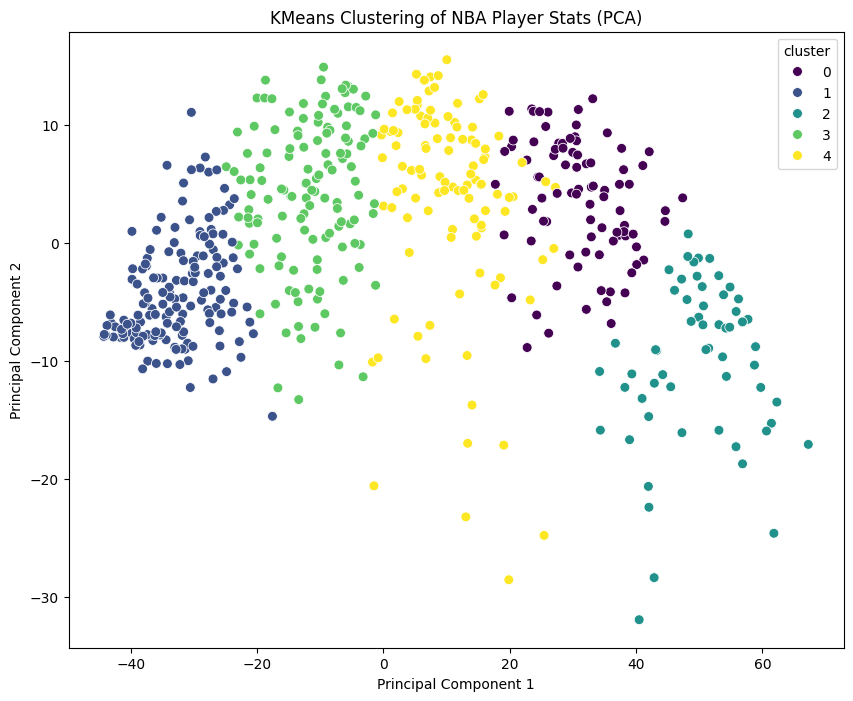

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_plot = pd.DataFrame(X_imputed, columns=X_weighted.drop('Player', axis=1).columns)
df_plot['cluster'] = labels

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)
df_plot['x'] = X_pca[:, 0]
df_plot['y'] = X_pca[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_plot, palette='viridis', s=50)
plt.title('KMeans Clustering of NBA Player Stats (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
df['cluster'] = labels

for cluster_num in range(5):  # Assuming 5 clusters
    print(f"\nPlayers in Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['Player'].values)


Players in Cluster 0:
['Grayson Allen' 'Jarrett Allen' 'OG Anunoby' 'OG Anunoby' 'Deni Avdija'
 'Deandre Ayton' 'Harrison Barnes' 'RJ Barrett' 'RJ Barrett'
 'Malik Beasley' 'Saddiq Bey' 'Malcolm Brogdon' 'Dillon Brooks'
 'Bruce Brown' 'Kentavious Caldwell-Pope' 'Clint Capela' 'Jordan Clarkson'
 'Nic Claxton' 'John Collins' 'Zach Collins' 'Mike Conley'
 'Spencer Dinwiddie' 'Luguentz Dort' 'Jalen Duren' 'Dorian Finney-Smith'
 'Daniel Gafford' 'Josh Giddey' 'Rudy Gobert' 'Aaron Gordon' 'Eric Gordon'
 'Jalen Green' 'James Harden' 'Tobias Harris' 'Gordon Hayward'
 'Jrue Holiday' 'Chet Holmgren' 'Kevin Huerter' "De'Andre Hunter"
 'Cameron Johnson' 'Jalen Johnson' 'Keldon Johnson' 'Derrick Jones Jr.'
 'Herbert Jones' 'Tyus Jones' 'Dereck Lively II' 'Brook Lopez'
 'Kyle Lowry' 'Jaden McDaniels' "De'Anthony Melton" 'Khris Middleton'
 'Brandon Miller' 'Evan Mobley' 'Keegan Murray' 'Jusuf Nurkić'
 'Jakob Poeltl' 'Jordan Poole' 'Michael Porter Jr.' 'Taurean Prince'
 'Duncan Robinson' 'Mitchell Ro

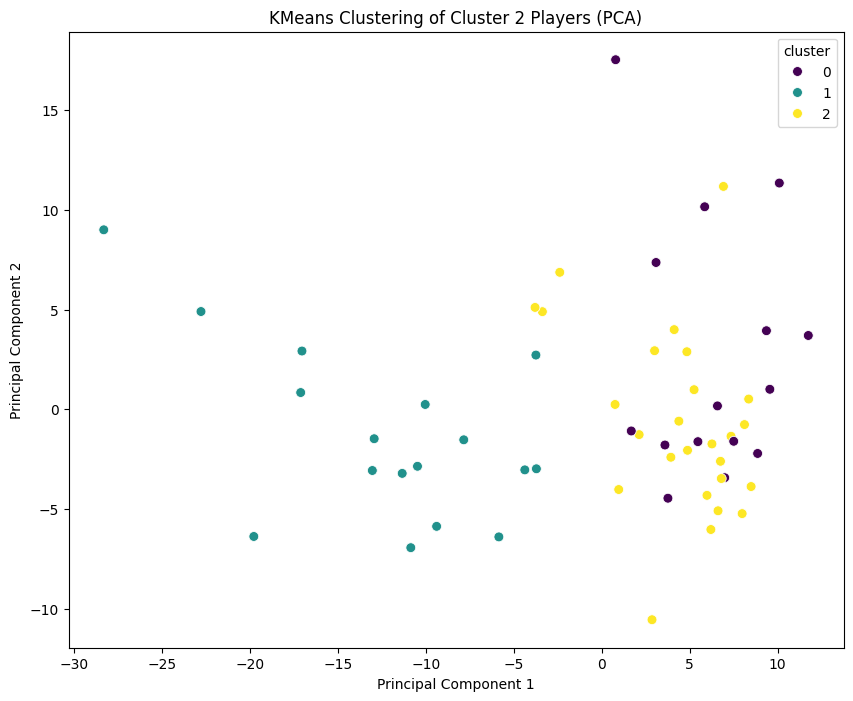

In [13]:
# Filter players in cluster 2
cluster_2_players = df[df['cluster'] == 2]

# Prepare data
X_cluster_2 = cluster_2_players.drop(['Player', 'Tm', 'cluster'], axis=1)
X_cluster_2 = pd.get_dummies(X_cluster_2, columns=['Pos'], drop_first=True)
imputer = SimpleImputer(strategy='mean')
X_cluster_2_imputed = imputer.fit_transform(X_cluster_2)

# Perform KMeans clustering on the filtered data
kmeans_cluster_2 = KMeans(n_clusters=3, random_state=0) # Adjust n_clusters as needed
kmeans_cluster_2.fit(X_cluster_2_imputed)
labels_cluster_2 = kmeans_cluster_2.labels_

# Create a DataFrame for plotting
df_cluster_2_plot = pd.DataFrame(X_cluster_2_imputed, columns=X_cluster_2.columns)
df_cluster_2_plot['cluster'] = labels_cluster_2

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_cluster_2_pca = pca.fit_transform(X_cluster_2_imputed)
df_cluster_2_plot['x'] = X_cluster_2_pca[:, 0]
df_cluster_2_plot['y'] = X_cluster_2_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_cluster_2_plot, palette='viridis', s=50)
plt.title('KMeans Clustering of Cluster 2 Players (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
cluster_2_players['sub_cluster'] = labels_cluster_2

for sub_cluster_num in range(3):
    print(f"\nPlayers in Sub-Cluster {sub_cluster_num} (from Cluster 2):")
    print(cluster_2_players[cluster_2_players['sub_cluster'] == sub_cluster_num]['Player'].values)


Players in Sub-Cluster 0 (from Cluster 2):
['Giannis Antetokounmpo' 'Stephen Curry' 'Anthony Davis' 'DeMar DeRozan'
 'Kevin Durant' 'Joel Embiid' 'Paul George' 'Shai Gilgeous-Alexander'
 'LeBron James' 'Nikola Jokić' 'Kawhi Leonard' 'Damian Lillard'
 'Julius Randle' 'Domantas Sabonis' 'Pascal Siakam']

Players in Sub-Cluster 1 (from Cluster 2):
['Bam Adebayo' 'LaMelo Ball' 'Bojan Bogdanović' 'Miles Bridges'
 'Jimmy Butler' 'Darius Garland' 'Tyler Herro' 'Kyrie Irving'
 'Zach LaVine' 'Lauri Markkanen' 'CJ McCollum' 'Ja Morant' 'Jamal Murray'
 'Kristaps Porziņģis' 'Terry Rozier' 'Anfernee Simons' 'Cam Thomas']

Players in Sub-Cluster 2 (from Cluster 2):
['Paolo Banchero' 'Desmond Bane' 'Scottie Barnes' 'Devin Booker'
 'Mikal Bridges' 'Jaylen Brown' 'Jalen Brunson' 'Cade Cunningham'
 'Luka Dončić' 'Anthony Edwards' "De'Aaron Fox" 'Jerami Grant'
 'Tyrese Haliburton' 'Brandon Ingram' 'Jaren Jackson Jr.' 'Kyle Kuzma'
 'Tyrese Maxey' 'Donovan Mitchell' 'Dejounte Murray' 'Alperen Şengün'
 'Ja

<ipython-input-14-09741972f4a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_players['sub_cluster'] = labels_cluster_2


In [15]:
for sub_cluster_num in range(3):
    players_in_subcluster = cluster_2_players[cluster_2_players['sub_cluster'] == sub_cluster_num]
    # Calculate the mean stats for each sub-cluster
    mean_stats = players_in_subcluster.mean(numeric_only=True)

    print(f"\nSub-Cluster {sub_cluster_num}:")
    print(mean_stats)

    if mean_stats['PTS'] > 20 and mean_stats['AST'] > 5:
        print("Assumption: Scorers and Playmakers")
    elif mean_stats['TRB'] > 10 and mean_stats['BLK'] > 1:
        print("Assumption: Paint and Defense")
    elif mean_stats['STL'] > 2 and mean_stats['3P'] > 2:
      print("Assumption: 3 and D")
    elif mean_stats['PTS'] < 15 and mean_stats['TRB'] < 6 and mean_stats['AST'] < 4:
      print("Assumption: Role Players")
    else:
        print("Assumption: Versatile Low-Value Players")


    print("Players:", players_in_subcluster['Player'].values)


Sub-Cluster 0:
Age            31.133333
G              30.666667
GS             30.666667
MP             34.920000
FG              9.293333
FGA            17.960000
FG%             0.517267
3P              1.720000
3PA             4.606667
3P%             0.355267
2P              7.566667
2PA            13.353333
2P%             0.561400
eFG%            0.564733
FT              5.806667
FTA             7.046667
FT%             0.826733
ORB             1.626667
DRB             6.346667
TRB             7.966667
AST             5.686667
STL             1.186667
BLK             0.846667
TOV             2.700000
PF              2.300000
PTS            26.093333
cluster         2.000000
sub_cluster     0.000000
dtype: float64
Assumption: Scorers and Playmakers
Players: ['Giannis Antetokounmpo' 'Stephen Curry' 'Anthony Davis' 'DeMar DeRozan'
 'Kevin Durant' 'Joel Embiid' 'Paul George' 'Shai Gilgeous-Alexander'
 'LeBron James' 'Nikola Jokić' 'Kawhi Leonard' 'Damian Lillard'
 'Julius Randle' '

In [34]:
for cluster_num in range(5):  # Iterate through the main clusters
    players_in_cluster = df[df['cluster'] == cluster_num]

    # Calculate the mean stats for each cluster
    mean_stats = players_in_cluster.mean(numeric_only=True)

    print(f"\nCluster {cluster_num}:")
    print(mean_stats)

    if mean_stats['PTS'] > 20 and mean_stats['AST'] > 5:
        print("Assumption: Scorers and Playmakers")
    elif mean_stats['TRB'] > 10 and mean_stats['BLK'] > 1:
        print("Assumption: Paint and Defense")
    elif mean_stats['STL'] > 2 and mean_stats['3P'] > 2:
      print("Assumption: 3 and D")
    elif mean_stats['PTS'] < 15 and mean_stats['TRB'] < 6 and mean_stats['AST'] < 4:
      print("Assumption: Role Players")
    else:
        print("Assumption: Versatile Low-Value Players")


    print("Players:", players_in_cluster['Player'].values)


Cluster 0:
Age        25.925234
G          25.934579
GS          8.056075
MP         23.857944
FG          3.586916
FGA         7.764486
FG%         0.466383
3P          1.294393
3PA         3.482243
3P%         0.355461
2P          2.291589
2PA         4.279439
2P%         0.541804
eFG%        0.550280
FT          1.343925
FTA         1.745794
FT%         0.754217
ORB         1.049533
DRB         2.998131
TRB         4.042991
AST         2.294393
STL         0.757009
BLK         0.430841
TOV         1.142056
PF          1.998131
PTS         9.810280
cluster     0.000000
dtype: float64
Assumption: Role players with lower overall production
Players: ['Ochai Agbaji' 'Santi Aldama' 'Nickeil Alexander-Walker' 'Kyle Anderson'
 'Cole Anthony' 'OG Anunoby' 'Marvin Bagley III' 'RJ Barrett'
 'Nicolas Batum' 'Nicolas Batum' 'Bradley Beal' 'Goga Bitadze'
 'Bismack Biyombo' 'Anthony Black' 'Bogdan Bogdanović' 'Malaki Branham'
 'Christian Braun' 'Alec Burks' 'Toumani Camara' 'Wendell Carter Jr.'
 

In [35]:
for cluster_num in range(5):
    players_in_cluster = df[df['cluster'] == cluster_num]

    # Calculate the mean stats for each cluster
    mean_stats = players_in_cluster.mean(numeric_only=True)

    print(f"\nCluster {cluster_num}:")
    print(mean_stats)

    if mean_stats['PTS'] > 20 and mean_stats['AST'] > 5:
        print("Assumption: Scorers and Playmakers")
    elif mean_stats['TRB'] > 10 and mean_stats['BLK'] > 1:
        print("Assumption: Paint and Defense")
    elif mean_stats['STL'] > 2 and mean_stats['3P'] > 2:
      print("Assumption: 3 and D")
    elif mean_stats['PTS'] < 15 and mean_stats['TRB'] < 6 and mean_stats['AST'] < 4:
      print("Assumption: Role Players")
    else:
        print("Assumption: Versatile Low-Value Players")


    print("Players:", players_in_cluster['Player'].values)


Cluster 0:
Age        25.925234
G          25.934579
GS          8.056075
MP         23.857944
FG          3.586916
FGA         7.764486
FG%         0.466383
3P          1.294393
3PA         3.482243
3P%         0.355461
2P          2.291589
2PA         4.279439
2P%         0.541804
eFG%        0.550280
FT          1.343925
FTA         1.745794
FT%         0.754217
ORB         1.049533
DRB         2.998131
TRB         4.042991
AST         2.294393
STL         0.757009
BLK         0.430841
TOV         1.142056
PF          1.998131
PTS         9.810280
cluster     0.000000
dtype: float64
Assumption: Role players with lower overall production
Players: ['Ochai Agbaji' 'Santi Aldama' 'Nickeil Alexander-Walker' 'Kyle Anderson'
 'Cole Anthony' 'OG Anunoby' 'Marvin Bagley III' 'RJ Barrett'
 'Nicolas Batum' 'Nicolas Batum' 'Bradley Beal' 'Goga Bitadze'
 'Bismack Biyombo' 'Anthony Black' 'Bogdan Bogdanović' 'Malaki Branham'
 'Christian Braun' 'Alec Burks' 'Toumani Camara' 'Wendell Carter Jr.'
 